In [8]:
import os
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pypsa
import xarray as xr

In [9]:
datapath = Path.cwd() / ".."

In [16]:
links = (
    pd.read_csv(
        datapath / "data" / "pypsa-gb-data" / "links_future.csv",
        index_col=0)
        .drop(
            columns="marginal_cost"
        )
    )

links["installed date"] = pd.to_datetime(links["installed date"])

name
BritNed        2020-01-01
EastWest       2020-01-01
Moyle          2020-01-01
Nemo           2020-01-01
IFA            2020-01-01
IFA2           2020-01-01
NSL            2021-01-01
ElecLink       2022-01-01
Viking Link    2023-01-01
Greenlink      2023-01-01
GridLink       2024-01-01
NeuConnect     2024-01-01
NorthConnect   2025-01-01
FAB Link       2025-01-01
Name: installed date, dtype: datetime64[ns]

In [39]:
pp = pd.read_csv(
    datapath / "resources" / "pypsa-fes" / "powerplants.csv",
    index_col=0)

pp.Country.unique()
pp = pp.query("Country == 'GB'")
pp.groupby("Technology").sum()["Capacity"]

Technology
CCGT                               33929.298061
OCGT                                 868.622432
Other or unspecified technology     4673.600000
Pumped Storage                       440.000000
Reservoir                            138.300000
Run-Of-River                        8788.900000
Steam Turbine                       8879.000000
not found                            119.000000
Name: Capacity, dtype: float64

In [25]:
dukes = pd.read_excel(datapath / "data" / "pypsa-gb-data" / "DUKES_5.11_2020.xls", sheet_name=None)

In [28]:
dukes.keys()

dict_keys(['Contents', '5.11', 'Database', 'DUKES 2019', 'DUKES 2018', 'DUKES 2017', 'DUKES 2016', 'DUKES 2015', 'DUKES 2014', 'DUKES 2013', 'DUKES 2012', 'DUKES 2011', 'DUKES 2010', 'DUKES 2009', 'DUKES 2008', 'DUKES 2007', 'DUKES 2006', 'DUKES 2005', 'DUKES 2004'])

In [ ]:
import 

<AxesSubplot:xlabel='Type'>

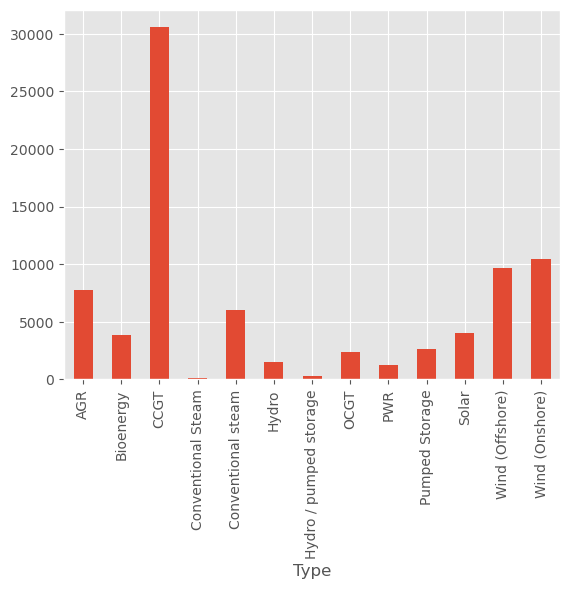

In [40]:
df = dukes["Database"]
df.columns = df.iloc[2]
df = df.iloc[3:]
df = df.loc[~df["Type"].isna()]

df.groupby("Type").sum()["Installed Capacity (MW)"].plot.bar()

In [1]:
import pandas as pd
a = pd.Series(0, range(3))

pd.DataFrame(a, columns=[5,6])

ValueError: Shape of passed values is (3, 1), indices imply (3, 2)

In [13]:
import pandas as pd
from pathlib import Path
import string

scenario_mapper = {
    "CT": "Consumer Transformation", 
    "ST": "System Transformation", 
    "LW": "Leading the Way", 
    "FS": "Falling Short",
    }


data_file = Path.cwd().parent / "data" / "FES 2023 Data Workbook V001.xlsx"

def get_electric_heat_demand(scenario, year, base_year=2019):
    """Electricity load in GB meeting heat demand"""

    col = string.ascii_uppercase.index("M")

    df = (
        pd.read_excel(data_file,
            sheet_name="EC.06",
            header=7,
            index_col=0,
            usecols=[col+i for i in range(47)],
            )
        ).iloc[:5]

    df.columns = pd.Series(df.columns).apply(lambda dt: dt.year)

    # The share of demand subsumed by the general electricity demand
    base_demand = df.loc["History", base_year]
    
    # future demand
    future_demand = df.loc[scenario_mapper[scenario], int(year)]
    return base_demand, future_demand


get_electric_heat_demand("FS", 2050)

                        2005 2006 2007  2008  2009  2010  2011  2012  2013  \
History                   34   32   30  36.0  35.0  36.0  29.0  27.0  26.0   
Consumer Transformation  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   
System Transformation    NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Leading the Way          NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Falling Short            NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                         2014  ...    2041    2042    2043    2044    2045  \
History                  24.0  ...     NaN     NaN     NaN     NaN     NaN   
Consumer Transformation   NaN  ...  68.818  71.876  74.164  75.745  76.690   
System Transformation     NaN  ...  35.598  38.099  40.671  43.331  46.071   
Leading the Way           NaN  ...  59.179  60.287  61.109  62.165  62.984   
Falling Short             NaN  ...  44.574  47.302  49.916  52.442  54.485   

                           2046    2047    2048    2049    205

(21.0, 69.14)

In [24]:
import numpy as np
import pandas as pd

a = pd.Series([0.5, 0.5, 0.], index=["a", "b", "c"])
b = pd.Series([1,2,3], range(3))


df = pd.DataFrame(
    np.outer(b.values, a.values),
    a.index,
    b.index,
)
df


,0,1,2
a,0.5,0.5,0.0
b,1.0,1.0,0.0
c,1.5,1.5,0.0
